## PROYECTO 

In [48]:
#echo "# proyecto_1" >> README.md
#git init
#git add README.md
#git commit -m "first commit"
#git branch -M main
#git remote add origin https://github.com/jrspm/proyecto_1.git
#git push -u origin main

#git remote add origin https://github.com/jrspm/proyecto_1.git
#git branch -M main
#git push -u origin main



#usar para actualizar el proyecto
#git commit -m "nombre_actualizacion"
#git push -u origin main




In [49]:
#------------------------------------- inicio paquetes necesarios -------------------------------------

import numpy as np # paquete para arrays

import pandas as pd # paquete para dataframes

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

#------------------------------------- fin paquetes necesarios -------------------------------------

### PASO 2

In [50]:

######################################################################################################
################################################ PASO 2 ##############################################
# Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validación
# y pruebas(20 %).
######################################################################################################

#-------------------------------------  inicio data frame cargar datos -------------------------------------

#cargar datos con el nombre del archivo y el numero de columnas, tambien puede reducir en un porcentaje 
class Datos_Proyecto:

    def __init__(self, nombre_archivo,lista_columnas): # todos los atributos del objeto

        self.array_total=np.load(nombre_archivo) #cargar el archivo usando el nombre, debe estar en la carpeta y deber ser un array

        self.lista_columnas_1=lista_columnas #lista del nombre de las columnas de array

        rows, columns = self.array_total.shape #obtener cantidad de filas, columnas del array

        self.cantidad_filas=rows #cantidad de filas del array

        self.array_tolist=self.array_total.tolist() # convertir en lista el array para poder usarlo en pandas

        self.dataframe_total=pd.DataFrame(self.array_tolist, columns=self.lista_columnas_1) # crear el dataframe y nombrar las columnas

        self.data_Reducido_trabajar=self.dataframe_total

        self.data_Reducido_comparar=self.dataframe_total

        self.porcentaje_reducir_self=0




    def reducir_data(self,porcentaje_reducir): #metodo para reducir el dataframe, porcentaje a reducir

        lista_reducir=[]

        if porcentaje_reducir<1 and porcentaje_reducir>0: # condicionante para reducir

            self.porcentaje_reducir_self=porcentaje_reducir

            cantidad_filas_porcentaje=int((self.cantidad_filas)*porcentaje_reducir) #cantidad de filas del porcentaje a reducir

            lista_total_valores=range(self.cantidad_filas)


            while len(lista_reducir)<cantidad_filas_porcentaje: # terminar el proceso hasta que se tengan todos los valores de la lista

                valor_random=np.random.choice(lista_total_valores) # seleccionar un valor random, entre 0 y la cantidad de datos

                if lista_reducir.count(valor_random)==0: # comparar que no exista el valor random
                
                    lista_reducir.append(valor_random) #agregar a la lista el valor random
            
            
            lista_reducir.sort() # ordenar la lista a reducir

            set_range_cantida_filas=set(list(range(self.cantidad_filas-1))) # conjunto de todas las filas dataframe

            lista_reducida_trabajar=list(set_range_cantida_filas.difference(set(lista_reducir))) #diferencia de conjuntos, lista de los valores a trabajar

            self.data_Reducido_trabajar=self.dataframe_total.drop(lista_reducir, axis=0) #dataframe de las filas que se trabajaran

            self.data_Reducido_comparar=self.dataframe_total.drop(lista_reducida_trabajar, axis=0) #dataframe de las filas que se compararan

            return self.data_Reducido_trabajar, self.data_Reducido_comparar

        else:

            print("Valor incorrecto")


    def valor_max_med_min_ptp_desv(self,list_num_int,redondear): #metodo para obtener los valores max_min_medio_ptp_desvi, ingresar 

        dic_val_max_med_min_ptp_desv={"VALORES":("MAXIMO","MEDIA","MINIMO","PEAK TO PEAK","DESVIACION")}

        for i in self.lista_columnas_1:

            data_1=self.data_Reducido_trabajar[i] #DATAFRAME DE CADA COLUMNA i 

            val_max=data_1.max() # obtener el valor maximo del dataframe
            val_med=data_1.mean() # obtener el valor medio del dataframe
            val_min=data_1.min() # obtener el valor minimo del dataframe 
            val_des=data_1.dropna().std() # obtener la desviacion estandar quitando los nan
            val_ptp=np.ptp(data_1.dropna()) # obtener el peak to peak quitando los nan

            val_cancatenados=[val_max,val_med,val_min,val_ptp,val_des] # hacer una lista de los valores

            if list_num_int.count(i)>0: #comparar si una de las columnas esta en el listado de enteros

                val_cancatenados = list(map(int, val_cancatenados)) # redondear enteros cuando la columna lo requiera

            else:

                val_cancatenados =[round(i,redondear) for i in val_cancatenados] # redondear hasta la cifra indicada


            val_cancatenados_1=tuple(val_cancatenados) # convertir en tupla la lista

            dic_val_max_med_min_ptp_desv[i]=val_cancatenados_1 # guardar en el diccionario la tupla con los valores segun la columna

        data_valores = pd.DataFrame(dic_val_max_med_min_ptp_desv) # crear un dataframe apartir de un diccionario
            
        return data_valores #regresa un dataframe con todos los valores

    def histograma_parejas(self,list_graf): #histogramas

        for i in list_graf:

            try:

                data_1=self.data_Reducido_trabajar[i].dropna().values.tolist() #DATAFRAME DE CADA COLUMNA i    

                df = pd.DataFrame(data_1, columns=[i]) # nombrar a la columna 

                plot = sns.displot(data = df, x=i )

                plt.title(f"DATA ({(1-self.porcentaje_reducir_self)*100})")
                plt.xticks(fontsize=9, rotation=45)
                plt.xlabel(i,fontsize=12)
                plt.ylabel('Counted',fontsize=12)
                plt.tight_layout()
                
            except:
                print("ERROR AL GENERAR LA GRAFICA DE LOS HISTOGRAMAS")
                pass

        plt.show()

    def factor_correlacion(self,lista_graf_2,num_parejas): # valores de correlacion

        list_corr=[]

        cont_1=0

        lista_columns_2=[]

        if num_parejas>len(lista_graf_2):

            print("ERROR EL VALOR DE LAS PAREJAS ES MAYOR A LA CANTIDAD DE LAS LISTAS")

        else:

            try:

                for i in lista_graf_2:

                    cont_1+=1

                    data_1=self.data_Reducido_trabajar[[i[1],i[0]]].dropna()

                    corr_1=data_1.corr().values.tolist()

                    key=i[1]+" VS "+i[0]

                    corr_value=round(corr_1[0][1],4)

                    lista_columns_2.append(key)

                    list_corr.append(corr_value)

                    array_data_1=data_1.values.tolist()

                    array2=np.reshape(array_data_1,-1)

                    lista_x=array2[0:-1:2]

                    lista_y=array2[1::2]          


                    plt.scatter(lista_x,lista_y)
                    plt.title(f"{key} ---- Corr:{corr_value}  DATA ({(1-self.porcentaje_reducir_self)*100})", fontsize = 12)
                    plt.xticks(fontsize=9, rotation=45)
                    plt.xlabel(i[1],fontsize=12)
                    plt.ylabel(i[0],fontsize=12)
                    plt.tight_layout()
                    plt.show()


                data_valores_corr = pd.DataFrame(list_corr, index=lista_columns_2, columns=["CORRELATIVO"])

                data_valores_corr = data_valores_corr.sort_values('CORRELATIVO',ascending=False)

                data_valores_entre_0_1=data_valores_corr.loc[data_valores_corr["CORRELATIVO"]!= 1, :]

                if (data_valores_entre_0_1.shape[0])>=num_parejas:

                    row_1=data_valores_entre_0_1.head(num_parejas)

                else:
        
                    row_1=data_valores_corr

                return data_valores_corr, row_1

            except: 

                print("Error al generar las graficas de las correlaciones")
                
                pass

    def entrenamiento_x(self,lista_graf_2,b1,b0,error,epchs,alpha): # entrenamiento 80 

        data_1=self.data_Reducido_trabajar[lista_graf_2].dropna()

        data_1_comparar=self.data_Reducido_comparar[lista_graf_2].dropna()

        num=data_1.shape[0]
        num_2=data_1_comparar.shape[0]

        array_list_1=[1]*(num)
        array_list_1_2=[1]*(num_2)

        data_1.insert(2, "ones", array_list_1)

        data_1_comparar.insert(2, "ones", array_list_1_2)

        data_2=pd.DataFrame(columns=["b1","b0",f"diff(y-y_{(1-self.porcentaje_reducir_self)*100})","epoch","pend_1","pend_2"])

        def det_error(data_1,lista_graf_2,b0_0,b1_1,b0_ant,b1_ant,error_ant,error_ant_x,alpha_x_y): # error para el entrenamiento 80 

            array_temp_x_1=np.array(data_1[[lista_graf_2[1],"ones"]].values.tolist())

            array_temp_y=np.array(data_1[lista_graf_2[0]].values.tolist())

            array_b1_bo=np.array([b1_1,b0_0])

            array_y_result=np.dot(array_temp_x_1,array_b1_bo)

            data_temp=pd.DataFrame({'x':array_temp_x_1[:, :1].reshape(-1).tolist(),'y_result':array_y_result.tolist(), "y":array_temp_y.tolist()})

            data_temp['(y_result - y)'] = data_temp['y_result'] - data_temp['y']

            data_temp['(y_result - y)^2']=data_temp['(y_result - y)']*data_temp['(y_result - y)']

            data_temp['x(y_result - y)']=data_temp['x']*data_temp['(y_result - y)']

            n_1=float(data_temp.shape[0])

            sum_3=(-1)*(data_temp['(y_result - y)'].sum())
            sum_3_x=(-1)*(data_temp['x(y_result - y)'].sum())


            error_actual=sum_3
            error_actual_x=sum_3_x


            pend_1=(b1_ant-b1_1)/(error_ant-error_actual)
            pend_2=(b0_ant-b0_0)/(error_ant-error_actual)

            b_1_next=b1_1-alpha_x_y*sum_3_x*pend_1
            b_0_next=b0_0-alpha_x_y*sum_3*pend_2

            return b_1_next, b_0_next, error_actual, b1_1, b0_0, pend_1, pend_2,error_actual_x


        def det_error_2(data_x,lista_graf_2,b0_train,b1_train): # error general cuando se tienen valores de b0 y b1

            array_temp_x_1=np.array(data_x[[lista_graf_2[1],"ones"]].values.tolist())

            array_temp_y=np.array(data_x[lista_graf_2[0]].values.tolist())

            array_b1_bo=np.array([b1_train,b0_train])

            array_y_result=np.dot(array_temp_x_1,array_b1_bo)

            data_temp=pd.DataFrame({'x':array_temp_x_1[:, :1].reshape(-1).tolist(),'y_result':array_y_result.tolist(), "y":array_temp_y.tolist()})

            data_temp['(y_result - y)'] = data_temp['y_result'] - data_temp['y']

            error_train=abs((data_temp['(y_result - y)'].sum()))

            return error_train

        def det_error_3(data_x_comparar,lista_graf_2,train_b0_x,train_b1_x,last_value_b0_x,last_value_b1_x, epchs__): # graficar y comparar con el 20% o con cualquier dato

            array_temp_x_1=np.array(data_x_comparar[[lista_graf_2[1],"ones"]].values.tolist())

            array_temp_y=np.array(data_x_comparar[lista_graf_2[0]].values.tolist())


            def error_3_3(array_temp_y__, array_temp_x_1__, b0_x, b1_x):

                array_b1_bo=np.array([b1_x,b0_x])

                array_y_result=np.dot(array_temp_x_1__,array_b1_bo)

                data_temp=pd.DataFrame({'x':array_temp_x_1__[:, :1].reshape(-1).tolist(),'y_result':array_y_result.tolist(), "y":array_temp_y__.tolist()})

                data_temp['(y_result - y)'] = data_temp['y_result'] - data_temp['y']

                error_x__=abs((data_temp['(y_result - y)'].sum()))

                return error_x__


            error_train__=error_3_3(array_temp_y, array_temp_x_1, train_b0_x, train_b1_x)

            error_epoch__=error_3_3(array_temp_y, array_temp_x_1, last_value_b0_x, last_value_b1_x)

            dic_epoca_bo_b1__={}

            dic_epoca_bo_b1__["Train_sklearn"]=[error_train__,train_b0_x,train_b1_x]
            dic_epoca_bo_b1__[epchs__]=[error_epoch__,last_value_b0_x,last_value_b1_x]

            #--------------------------------------------------------------------------
            #--------------- grafica de barras inicio --------------------------------

            error_train__=error_3_3(array_temp_y, array_temp_x_1, train_b0_x, train_b1_x)

            error_epoch__=error_3_3(array_temp_y, array_temp_x_1, last_value_b0_x, last_value_b1_x)



            x = ["Train_sklearn", f"Epchs = {epchs__}"]
            y = [error_train__, error_epoch__]

            sns.barplot(x, y, color='blue').set(title=f'diff(y-y_{(self.porcentaje_reducir_self)*100}) | Train_sklearn vs Epchs = {epchs__} ')
            plt.legend(labels=[f"Train_sklearn = {error_train__}", f"Epchs {round(epchs__,2)} = {round(error_epoch__,2)}"])
            plt.show()

            #--------------- grafica de barras fin -------------------------------------
            #----------------------------------------------------------------------------

            fig, ax = plt.subplots()
            ax.set_title(f'COMPARACION DEL MODELO ({(self.porcentaje_reducir_self)*100})| {lista_graf_2[0]} vs {lista_graf_2[1]}')
            ax.set_xlabel(lista_graf_2[1])
            ax.set_ylabel(lista_graf_2[0])
            lista_y=np.array(data_x_comparar[lista_graf_2[0]].values.tolist())
            lista_x=np.array(data_x_comparar[lista_graf_2[1]].values.tolist())
            array_list_1=[1]*(len(lista_x))
            ax.scatter(lista_x,lista_y)    

            for i in dic_epoca_bo_b1__:

                val=""
                try:

                    val=f"EP = {int(i)}"

                except:

                    val=f"{i}"

                    pass


                print("-------------------------------------------------------------")

                #dic_epoca_bo_b1[cont_1]=[b0_0,b1_1,error_actual_abs]

                print(f"EPOCA = {i}")
                print(f"diff(y-y_{(self.porcentaje_reducir_self)*100}) = {dic_epoca_bo_b1__[i][0]}")
                vect_1=np.array([dic_epoca_bo_b1__[i][2]])
                print(f"VALOR DE B1 ={dic_epoca_bo_b1__[i][2]}")
                vect_2=np.reshape(lista_x,(-1,1))
                vect_b1x=np.dot(vect_2,vect_1)
                vect_3=np.array([dic_epoca_bo_b1__[i][1]])
                print(f"VALOR DE B0 ={dic_epoca_bo_b1__[i][1]}")
                vect_4=np.reshape(array_list_1,(-1,1))
                vect_b0=np.dot(vect_4,vect_3)
                y = vect_b1x+vect_b0
                ax.plot(lista_x, y, label = f"{val} | diff(y-y_{(self.porcentaje_reducir_self)*100}) ={round(dic_epoca_bo_b1__[i][0],1)}")
                plt.tight_layout()
                ax.legend()

            print("-------------------------------------------------------------")

            plt.show()

            return error_train__, error_epoch__


        cont_1=0

        cont_2=0

        cont_3=0

        list_epocs=[]

        dic_epoca_bo_b1={}

        var_1=False

        cont_true=0

        cont_4=0

        cont_idex=0

        last_value_b1=0 
        last_epoch=0
        last_value_b0=0
        last_value_error=0
        error_train=0
        train_b1=0
        train_b0=0

        while True:

            if cont_1==0:

                # print("..................................................................")


                # print("ingreso")

                # print(f"  b0_next={b0}")
                # print(f"  b1_next={b1}")
                # print(f"  error_ant_actual={alpha}")

                                                                                            #det_error(data_1,lista_graf_2,b0_0,b1_1,b0_ant,b1_ant,error_ant,error_ant_x)
                b_1_next, b_0_next, error_actual, b1_1, b0_0, pend_1, pend_2,error_actual_x=det_error(data_1,lista_graf_2,b0,b1,0,0,error,error,alpha)

                error_actual_abs=abs(error_actual)

                data_2.loc[cont_idex]=[b1_1, b0_0,error_actual_abs,cont_1,pend_1,pend_2]

                cont_idex+=1
                
                dic_epoca_bo_b1[cont_1]=[b0_0,b1_1,error_actual_abs]

                # print("resultados")

                # print(f"  b0_next={b_0_next}")
                # print(f"  b1_next={b_1_next}")
                # print(f"  error_actual={error_actual}")
                # print(f"  b0_ant={b0_0}")
                # print(f"  b1_ant={b1_1}")
                # print(f"  pend_b1={pend_1}")
                # print(f"  pend_b0={pend_2}")
                # print(f"  error_actual_x={error_actual_x}")

                # print("..................................................................")



            else:

                pent_ant_1=pend_1
                pent_ant_2=pend_2
                error_ant_x=error_actual_x
                error_ant=error_actual
                b1_1_ant=b1_1
                b0_0_ant=b0_0

                # print("..................................................................")


                # print("ingreso")

                # print(f"  b0_next={b_0_next}")
                # print(f"  b1_next={b_1_next}")
                # print(f"  b0_ant={b0_0_ant}")
                # print(f"  b1_ant={b1_1_ant}")
                # print(f"  error_ant={error_ant}")
                # print(f"  error_ant_x={error_ant_x}")   

                                                                                            #det_error(data_1,lista_graf_2,b0_0,b1_1,b0_ant,b1_ant,error_ant,error_ant_x)
                b_1_next, b_0_next, error_actual, b1_1, b0_0, pend_1, pend_2,error_actual_x=det_error(data_1,lista_graf_2,b_0_next,b_1_next,b0_0_ant,b1_1_ant,error_ant,error_ant_x,alpha)

                error_actual_abs=abs(error_actual)

                data_2.loc[cont_idex]=[b1_1, b0_0,error_actual_abs,cont_1,pend_1,pend_2]

                cont_idex+=1
                
                dic_epoca_bo_b1[cont_1]=[b0_0,b1_1,error_actual_abs]

                # print("resultados")

                # print(f"  b0_next={b_0_next}")
                # print(f"  b1_next={b_1_next}")
                # print(f"  error_actual={error_actual}")
                # print(f"  b0_ant={b0_0}")
                # print(f"  b1_ant={b1_1}")
                # print(f"  pend_b1={pend_1}")
                # print(f"  pend_b0={pend_2}")
                # print(f"  error_actual_x={error_actual_x}")
                # input()
                # print("..................................................................")

                finalizar=""

                if cont_3==epchs:

                    cont_3=0
 
                    error_actual_abs=abs(error_actual)

                    data_2.loc[cont_idex]=[b1_1, b0_0,error_actual_abs,cont_1,pend_1,pend_2]

                    cont_idex+=1
                    
                    dic_epoca_bo_b1[cont_1]=[b0_0,b1_1,error_actual_abs]

                    data_3 = data_2.sort_values(f'diff(y-y_{(1-self.porcentaje_reducir_self)*100})',ascending=True)

                    data_3.replace([np.inf, -np.inf], np.nan, inplace=True)

                    data_3=data_3.dropna()

                    val_med=data_3[f"diff(y-y_{(1-self.porcentaje_reducir_self)*100})"].mean()

                    data_3 = data_3.loc[data_3[f'diff(y-y_{(1-self.porcentaje_reducir_self)*100})'] >0].drop_duplicates(subset = [f'diff(y-y_{(1-self.porcentaje_reducir_self)*100})'])

                    print(data_2)

                    #print(data_menor_media)

                    data_menor_media_snan=data_3.dropna()

                    print()
                    print()
                    print(data_3)

                    #print(data_menor_media_snan)

                    selected_3_rows=data_menor_media_snan[['epoch']].head(n=1)

                    list_epochs_menor_media=set(selected_3_rows['epoch'].values.tolist())

                    keys_dic=set(dic_epoca_bo_b1.keys())

                    keys_dic=list_epochs_menor_media.intersection(keys_dic)

                    keys_dic.add(0)

                    #keys_dic.add(3)
                    
                    fig, ax = plt.subplots()
                    ax.set_title(f'ENTRENAMIENTO DEL MODELO ({(1-self.porcentaje_reducir_self)*100}) | {lista_graf_2[0]} vs {lista_graf_2[1]}')
                    ax.set_xlabel(lista_graf_2[1])
                    ax.set_ylabel(lista_graf_2[0])
                    lista_y=np.array(data_1[lista_graf_2[0]].values.tolist())
                    lista_x=np.array(data_1[lista_graf_2[1]].values.tolist())
                    array_list_1=[1]*(len(lista_x))
                    ax.scatter(lista_x,lista_y)

                    list_keys_dic=list(keys_dic)

                    list_keys_dic.sort(reverse=True)

                    max_epoch=max(list_keys_dic)

                    

                    cont_5=0

                    data_3 = data_3.loc[data_3['epoch'] < max_epoch].drop_duplicates(subset = ['epoch'])


                    array_temp_x_1=np.array(data_1[lista_graf_2[1]].values.tolist())

                    array_temp_y=np.array(data_1[lista_graf_2[0]].values.tolist())

                    array_temp_x_1=array_temp_x_1.reshape(-1,1)
                    array_temp_y=array_temp_y.reshape(-1,1)


                    model=LinearRegression()

                    model.fit(array_temp_x_1,array_temp_y)
                    R_sq = model.score(array_temp_x_1,array_temp_y)

                    train_b1=(model.coef_).tolist()[0][0]
                    train_b0=(model.intercept_).tolist()[0]

                    error_train=det_error_2(data_1,lista_graf_2,train_b0,train_b1)

                    dic_epoca_bo_b1["Train_sklearn"]=[train_b0,train_b1,error_train]

                    list_keys_dic.append("Train_sklearn")


                    for i in set(list_keys_dic):

                        val=""
                        try:

                            val=f"EP = {int(i)}"

                        except:

                            val=f"{i}"

                            pass


                        print("-------------------------------------------------------------")

                        print(f"EPOCA = {i}")
                        print(f"diff(y-y_{(1-self.porcentaje_reducir_self)*100}) = {dic_epoca_bo_b1[i][2]}")
                        vect_1=np.array([dic_epoca_bo_b1[i][1]])
                        print(f"VALOR DE B1 ={dic_epoca_bo_b1[i][1]}")
                        vect_2=np.reshape(lista_x,(-1,1))
                        vect_b1x=np.dot(vect_2,vect_1)
                        vect_3=np.array([dic_epoca_bo_b1[i][0]])
                        print(f"VALOR DE B0 ={dic_epoca_bo_b1[i][0]}")
                        vect_4=np.reshape(array_list_1,(-1,1))
                        vect_b0=np.dot(vect_4,vect_3)
                        y = vect_b1x+vect_b0
                        ax.plot(lista_x, y, label = f"{val} | diff(y-y_{(1-self.porcentaje_reducir_self)*100}) ={round(dic_epoca_bo_b1[i][2],1)}")
                        plt.tight_layout()
                        ax.legend()

                        cont_5+=1

                        if cont_5==6:

                            break

                    print("-------------------------------------------------------------")

                    plt.show()


                    #--------------- grafica de barras inicio --------------------------------

                    x = ["Train_sklearn",max_epoch]
                    y = [dic_epoca_bo_b1["Train_sklearn"][2],dic_epoca_bo_b1[max_epoch][2]]

                    sns.barplot(x, y, color='blue').set(title=f'diff(y-y_{(1-self.porcentaje_reducir_self)*100}) | Train_sklearn vs Epchs = {max_epoch} ')
                    plt.legend(labels=[f"Train_sklearn = {y[0]}", f"Epchs {max_epoch} = {round(y[1],2)}"])
                    plt.show()

                    #--------------- grafica de barras fin -------------------------------------

                    #data_2=pd.DataFrame(columns=["b1","b0","error","epoch","pend_1","pend_2"])

                    def graficas(data_graf,lista_graf):

                        data_2_reducido=data_graf[lista_graf].dropna()

                        key=f"{lista_graf[0]} vs {lista_graf[1]}"

                        array_data_1=data_2_reducido.values.tolist()

                        array2=np.reshape(array_data_1,-1)

                        lista_y=array2[0:-1:2]

                        lista_x=array2[1::2]

                        last_value_x=max(lista_x)

                        lista_1_columnas_todos = data_graf.loc[data_graf[lista_graf[1]] == last_value_x]

                        last_value_y = lista_1_columnas_todos[lista_graf[0]].tolist()

                        val_1=data_graf[lista_graf].dropna()

                        fig, ax = plt.subplots()         
                        ax.plot(lista_x,lista_y,label = f"{lista_graf[1]} = {last_value_x} | {lista_graf[0]} = {last_value_y[0]} ")
                        plt.title(key, fontsize = 12)
                        plt.xticks(fontsize=9, rotation=45)
                        plt.xlabel(lista_graf[1],fontsize=12)
                        plt.ylabel(lista_graf[0],fontsize=12)
                        plt.tight_layout()
                        ax.legend()
                        plt.show()

                        last_value_y_1=last_value_y[0]

                        last_value_x_1=last_value_x

                        return last_value_y_1, last_value_x_1

                    
                    last_value_b1, last_epoch=graficas(data_3,["b1","epoch"])
                    last_value_b0, last_epoch=graficas(data_3,["b0","epoch"])
                    last_value_error, last_epoch=graficas(data_3,[f"diff(y-y_{(1-self.porcentaje_reducir_self)*100})","epoch"])



                    finalizar=input("Escriba Y si desea terminar o presione ENTER para repertir la cantidad de epocas = ")



                if finalizar=="Y":

                    break


            cont_1+=1

            cont_2+=1

            cont_3+=1

            
        print(f"Con un error inicial de alpha={alpha} y con valores de b1={b1} y b0={b0} se necesitaron {len(list_epocs)} epocas")


        error_train, error_epchs=det_error_3(data_1_comparar,lista_graf_2,train_b0,train_b1,last_value_b0,last_value_b1,last_epoch)
        

        dic_result_train={"last_b1":last_value_b1, "last_b0":last_value_b0, f"last_diff(y-y_{(1-self.porcentaje_reducir_self)*100})":last_value_error, 
            "last_epchs":last_epoch, "train_b0":train_b0, "train_b1":train_b1,f"train_diff(y-y_{(1-self.porcentaje_reducir_self)*100})":error_train,
            f"last_diff(y-y_{(self.porcentaje_reducir_self)*100})":error_epchs,f"train_diff(y-y_{(self.porcentaje_reducir_self)*100})":error_train}

        return dic_result_train


#-------------------------------------  fin data frame cargar datos -------------------------------------


INGRESAR DATOS Y NOMBRAR LAS COLUMNAS

In [51]:
lista_1=["PRECIO",
    "CALIDAD_MATERIAL",
    "AREA_PISO",
    "TOTAL_HABITACIONES",
    "AÑO_CONSTRUCCION",
    "FRENTE"] # LISTA DE LOS NOMBRES DE LAS COLUMNAS

datos_1=Datos_Proyecto("proyecto_training_data.npy",lista_1) # leer los datos


DATAFRAME DE TODOS LOS DATOS 

In [52]:
print(datos_1.dataframe_total) # DATAFRAME DE TODOS LOS DATOS 

        PRECIO  CALIDAD_MATERIAL  AREA_PISO  TOTAL_HABITACIONES  \
0     208500.0               7.0      856.0                 8.0   
1     181500.0               6.0     1262.0                 6.0   
2     223500.0               7.0      920.0                 6.0   
3     140000.0               7.0      961.0                 7.0   
4     250000.0               8.0     1145.0                 9.0   
...        ...               ...        ...                 ...   
1455  175000.0               6.0      953.0                 7.0   
1456  210000.0               6.0     2073.0                 7.0   
1457  266500.0               7.0     1188.0                 9.0   
1458  142125.0               5.0     1078.0                 5.0   
1459  147500.0               5.0     1256.0                 6.0   

      AÑO_CONSTRUCCION  FRENTE  
0               2003.0    65.0  
1               1976.0    80.0  
2               2001.0    68.0  
3               1915.0    60.0  
4               2000.0    84.0

DATAFRAME  entrenamiento(80 %)

In [53]:
data_Reducido_from_datos_1=datos_1.reducir_data(0.2) # reducir los datos en el 20%
print(data_Reducido_from_datos_1[0]) # DATAFRAME  entrenamiento(80 %)

        PRECIO  CALIDAD_MATERIAL  AREA_PISO  TOTAL_HABITACIONES  \
2     223500.0               7.0      920.0                 6.0   
3     140000.0               7.0      961.0                 7.0   
4     250000.0               8.0     1145.0                 9.0   
5     143000.0               5.0      796.0                 5.0   
9     118000.0               5.0     1077.0                 5.0   
...        ...               ...        ...                 ...   
1453   84500.0               5.0     1140.0                 6.0   
1454  185000.0               7.0     1221.0                 6.0   
1455  175000.0               6.0      953.0                 7.0   
1457  266500.0               7.0     1188.0                 9.0   
1458  142125.0               5.0     1078.0                 5.0   

      AÑO_CONSTRUCCION  FRENTE  
2               2001.0    68.0  
3               1915.0    60.0  
4               2000.0    84.0  
5               1993.0    85.0  
9               1939.0    50.0

DATAFRAME pruebas(20 %)

In [54]:
print(data_Reducido_from_datos_1[1]) # DATAFRAME pruebas(20 %)

        PRECIO  CALIDAD_MATERIAL  AREA_PISO  TOTAL_HABITACIONES  \
0     208500.0               7.0      856.0                 8.0   
1     181500.0               6.0     1262.0                 6.0   
6     307000.0               8.0     1694.0                 7.0   
7     200000.0               7.0     1107.0                 7.0   
8     129900.0               7.0     1022.0                 8.0   
...        ...               ...        ...                 ...   
1419  223000.0               6.0     1844.0                 7.0   
1428  119000.0               5.0      804.0                 4.0   
1439  197000.0               7.0     1040.0                 6.0   
1456  210000.0               6.0     2073.0                 7.0   
1459  147500.0               5.0     1256.0                 6.0   

      AÑO_CONSTRUCCION  FRENTE  
0               2003.0    65.0  
1               1976.0    80.0  
6               2004.0    75.0  
7               1973.0     NaN  
8               1931.0    51.0

### PASO 3

Análisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o
pandas):

1. media
2. valor máximo
3. valor mínimo
4. valor rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
5. desvianción estándar

In [55]:

#------------------------------------- inicio max_min_medio_ptp_desvi -------------------------------------

lista_enteros=["AÑO_CONSTRUCCION"] # columnas que deben ser enteros


#ingresar los valores de la lista de las columnas que deben ser enteros y el valor de los decimales
data_valores=datos_1.valor_max_med_min_ptp_desv(lista_enteros,4) #obtener la media de cada columna en un diccionario

#------------------------------------- fin  max_min_medio_ptp_desvi ------------------------------------------

print(data_valores)


        VALORES       PRECIO  CALIDAD_MATERIAL  AREA_PISO  TOTAL_HABITACIONES  \
0        MAXIMO  755000.0000           10.0000  4692.0000             14.0000   
1         MEDIA  182852.9709            6.1276  1167.8382              6.5479   
2        MINIMO   34900.0000            1.0000   334.0000              2.0000   
3  PEAK TO PEAK  720100.0000            9.0000  4358.0000             12.0000   
4    DESVIACION   81137.1342            1.3971   388.7107              1.6396   

   AÑO_CONSTRUCCION    FRENTE  
0              2010  313.0000  
1              1971   70.4494  
2              1872   21.0000  
3               138  292.0000  
4                30   24.3739  


### PASO 4

Imprimir histogramas

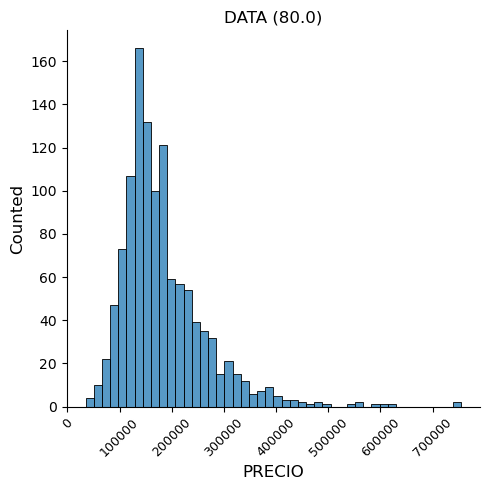

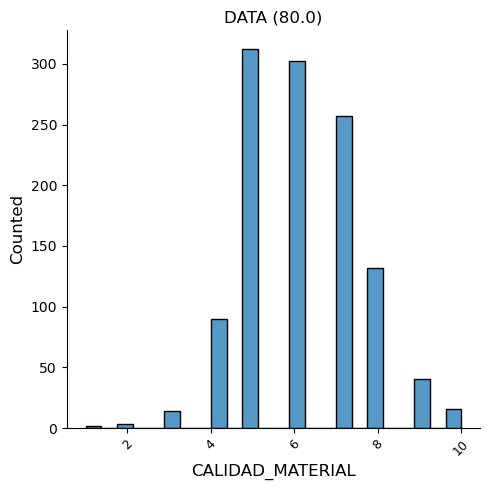

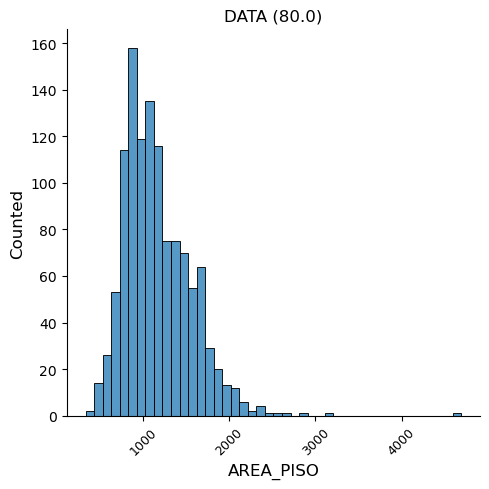

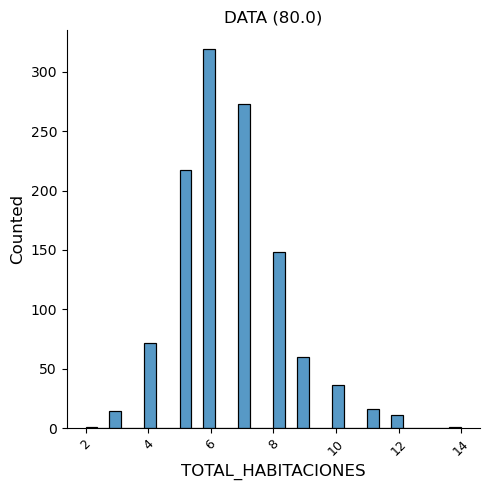

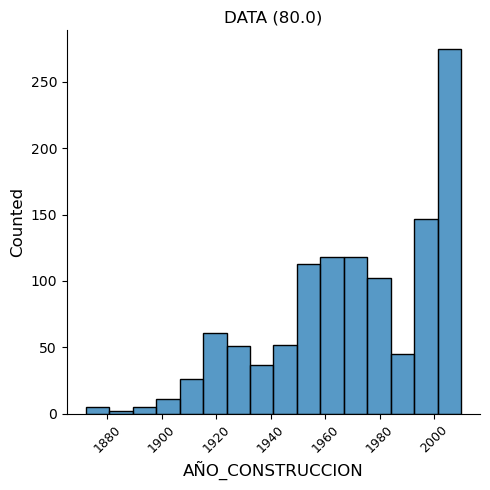

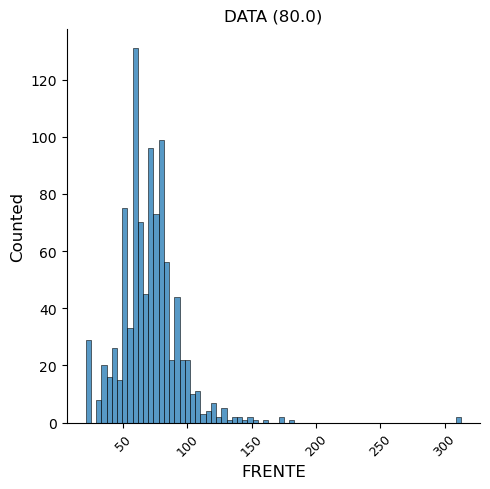

In [56]:
#ingresar en un listado el nombre de las tablas a las que se les desea generar un histograma [tab1,tab2,tab3]

lista_of_columns=["PRECIO","CALIDAD_MATERIAL","AREA_PISO","TOTAL_HABITACIONES","AÑO_CONSTRUCCION","FRENTE"]

datos_1.histograma_parejas(lista_of_columns)


### PASO 5

Para cada variable independiente x :

1. Calcular el coeficiente de correlación entre x y y.
2. Graficar x vs y(scatterplot) usando matplotlib.
3. Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica.
4. Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables
   con más potencial predictivo es decir las 2 variables que presentan mayor correlación
   entre dicha variable y la variable dependiente.

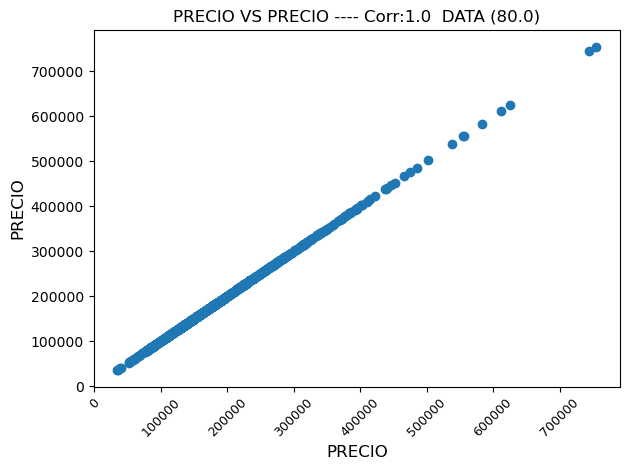

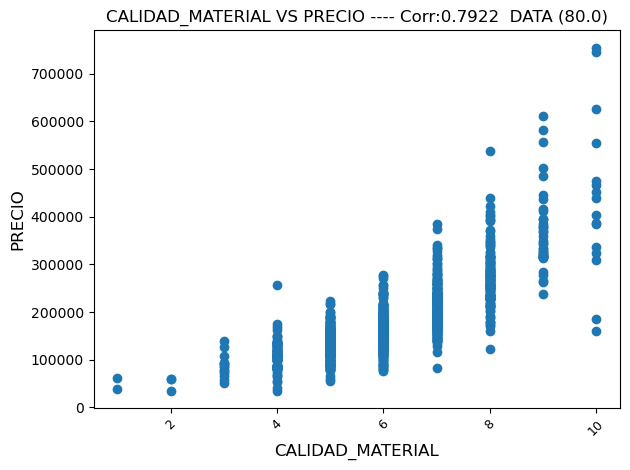

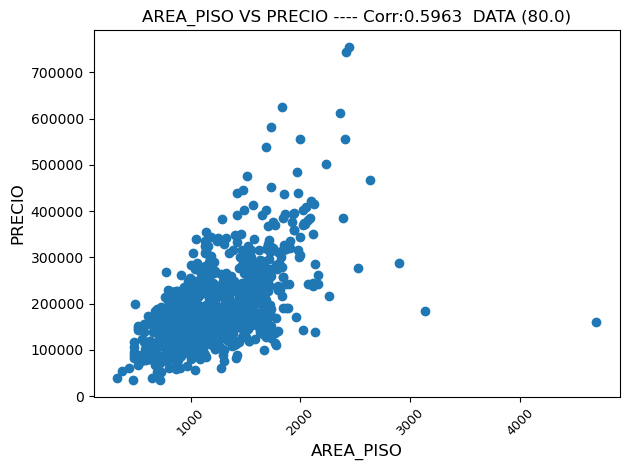

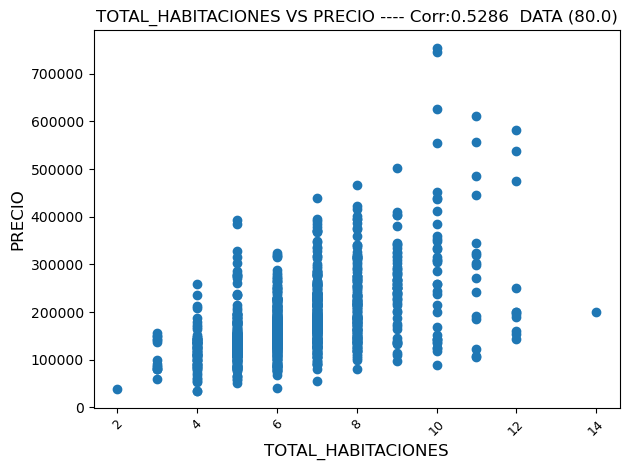

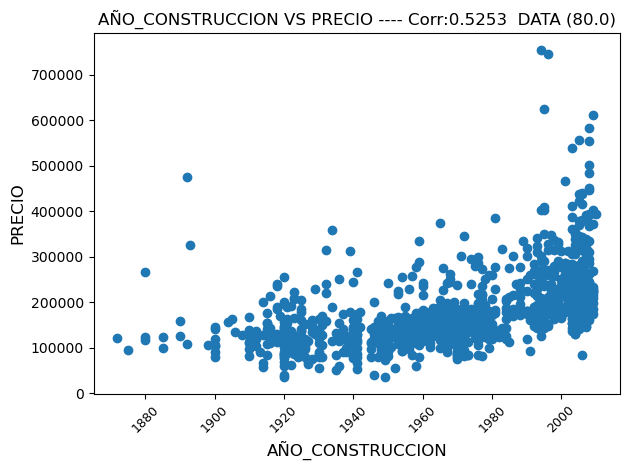

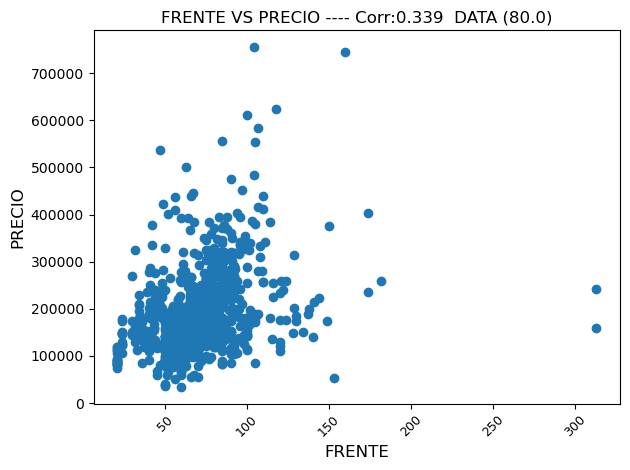

TODOS_LOS_VALORES_CORRELATIVOS
                              CORRELATIVO
PRECIO VS PRECIO                   1.0000
CALIDAD_MATERIAL VS PRECIO         0.7922
AREA_PISO VS PRECIO                0.5963
TOTAL_HABITACIONES VS PRECIO       0.5286
AÑO_CONSTRUCCION VS PRECIO         0.5253
FRENTE VS PRECIO                   0.3390

VALORES_CORRELATIVOS_SELECCIONADOS_CERCANOS_A_1
                            CORRELATIVO
CALIDAD_MATERIAL VS PRECIO       0.7922
AREA_PISO VS PRECIO              0.5963


In [57]:
lista_graf_2=[["PRECIO","PRECIO"],
    ["PRECIO","CALIDAD_MATERIAL"],
    ["PRECIO","AREA_PISO"],
    ["PRECIO","TOTAL_HABITACIONES"],
    ["PRECIO","AÑO_CONSTRUCCION"],
    ["PRECIO","FRENTE"]] 

#ingresa las listas de las tablas que se compararan y se agrega la cantidad de 
#parejas a analizar, quienes serán las mas cercanas a 1, pero no 1 
data_valores_corr,data_valores_corr_1=datos_1.factor_correlacion(lista_graf_2,2)

print("TODOS_LOS_VALORES_CORRELATIVOS")
print(data_valores_corr)
print()
print("VALORES_CORRELATIVOS_SELECCIONADOS_CERCANOS_A_1")
print(data_valores_corr_1)


### PASO 6
Determinar para determinar los valores de $b^{1}$ y $b^{0}$, que forman la recta $y=b^{1}x+b^{0}$.

$b^{1}_{i+1}=b^{1}_{i}+ex_{i} \alpha \left( \dfrac{b^{1}_{i-1}-b^{1}_{i}}{e_{i-1}-e_{i}} \right )$

$b^{0}_{i+1}=b^{0}_{i}+e_{i} \alpha \left( \dfrac{b^{0}_{i-1}-b^{0}_{i}}{e_{i-1}-e_{i}} \right )$

En donde:

$i$= Epoca

$\alpha$= constante que ayuda a refinar el resultado, entre mas pequeño, mas cantidad de epocas necesitara

$j$= Numero de filas del dataframe

$ex_{i}=\sum_{i,j=1}^{n}\left( \left(  y^{real}_{i,j} -y^{resultado}_{i,j} \right)\cdot x_{i,j} \right)$ Donde la epoca ($i$) se conoce

$e_{i}=\sum_{i,j=1}^{n} \left(  y^{real}_{i,j} -y^{resultado}_{i,j} \right)$ Donde la epoca ($i$) se conoce

Se toman en cuenta unicamente las epocas antes de que las pendientes $Pnd_{1}=\left( \dfrac{b^{1}_{i-1}-b^{1}_{i}}{e_{i-1}-e_{i}} \right )$ y $Pnd_{2}=\left( \dfrac{b^{0}_{i-1}-b^{0}_{i}}{e_{i-1}-e_{i}} \right )$ tiendan a cero o al infinito. Tambien donde el error $e_{i}$ tienda al infinito o a cero. 


Para este ejercicio el usuario podra seleccionar la cantidad de epocas y el valor de $\alpha$, debe proponer los valores de $b^{1}_{0}$ y $b^{0}_{0}$, tambien debe proponer el primer error, se recomienda que sea mayor a cero, ya que cero, podría provocar una recta horizontal. 

El usuario debe indicar cuales sera las columnas que se compararan y cual sera la variable dependiente e independiente, para ello debe colocar el nombre de las listas asi ----- lista=[variable_dependiente_y,variable_dependiente_x] si el usuario ve que no llega a un valor constante o que las graficas de $b^{1}_{0}$vsEpochs y $b^{0}_{0}$vsEpochs no llegan a un valor casi constante, entonces basta con darle ENTER y el proceso continuara, sumando las epochs anteriores mas la epocas que definio al inicio, de la siguiente forma.

1. analisis  epocs=6000 (no hay una tendencia clara), al dar enter el analisis continuara desde 6001 hasta 12000 epocs+=epocs, ya que se va sumando y el analisis continua desde donde quedo al inicio, si desea finalizarlo, cuando le pregunte el programa debe escribir la letra Y.

Automaticamente se generan los resultados de la comparación con sklearn del 80% y el 20%. Al finalizar se imprime un diccionario con el resumen de los resultados, tanto del entrenamiento vs sklearn con el 80% y el 20%. 

PRIMER_ANALISIS
                b1           b0  diff(y-y_80.0)   epoch    pend_1  \
0     10000.000000 -5000.000000    1.478423e+08     0.0  0.000068   
1      9993.317654 -4999.499998    1.478895e+08     1.0 -0.000141   
2     10007.296292 -4999.656524    1.477896e+08     2.0 -0.000140   
3     10021.120503 -4999.679688    1.476907e+08     3.0 -0.000140   
4     10034.914315 -4999.683147    1.475920e+08     4.0 -0.000140   
...            ...          ...             ...     ...       ...   
5997  30966.247715 -4999.683755    2.213534e+06  5997.0 -0.000140   
5998  30966.536825 -4999.683755    2.215603e+06  5998.0 -0.000140   
5999  30966.825750 -4999.683755    2.217671e+06  5999.0 -0.000140   
6000  30967.114488 -4999.683755    2.219738e+06  6000.0 -0.000140   
6001  30967.114488 -4999.683755    2.219738e+06  6000.0 -0.000140   

            pend_2  
0    -3.381994e-05  
1     1.058394e-05  
2     1.567412e-06  
3     2.341934e-07  
4     3.503728e-08  
...            ...  
5997  0.

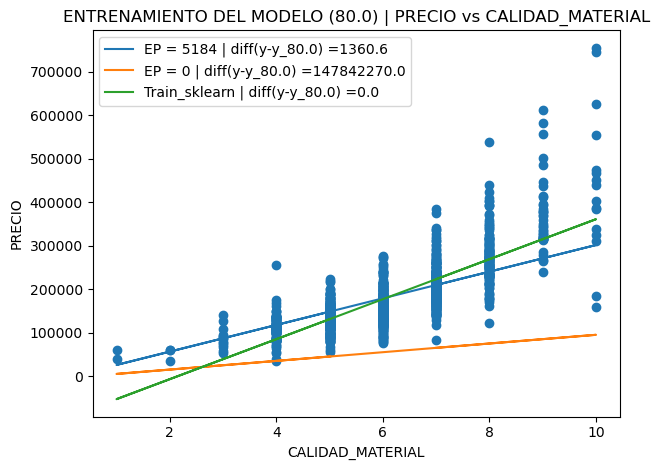

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


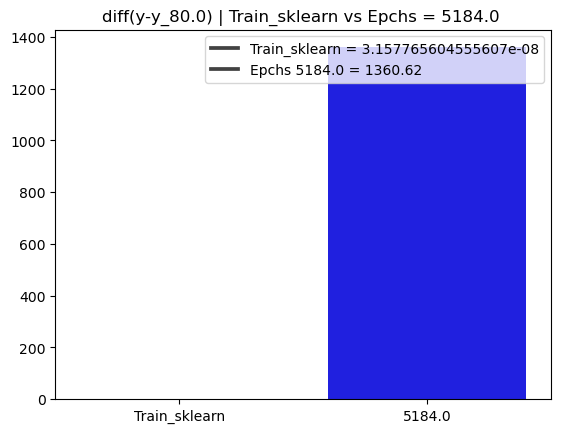

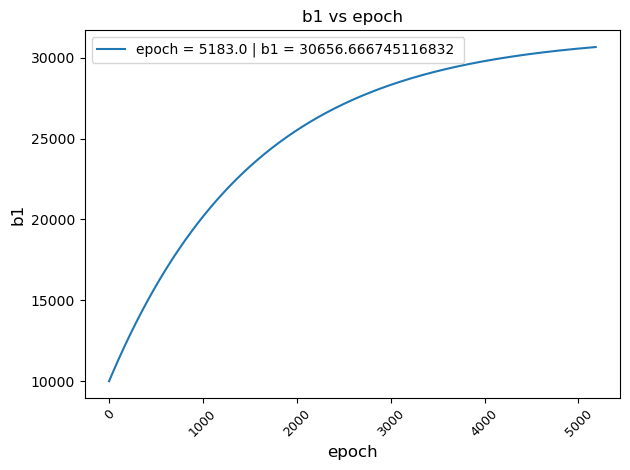

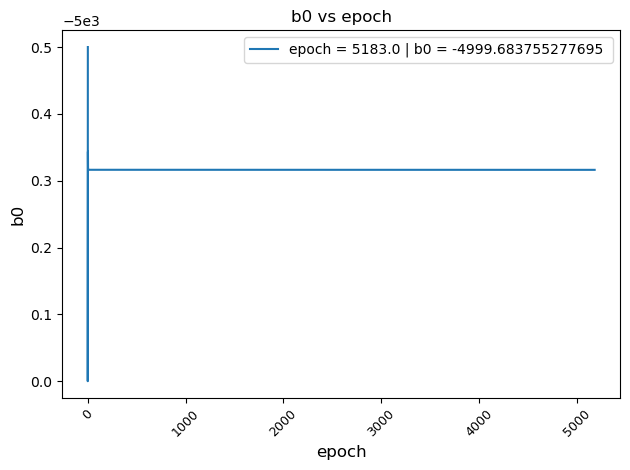

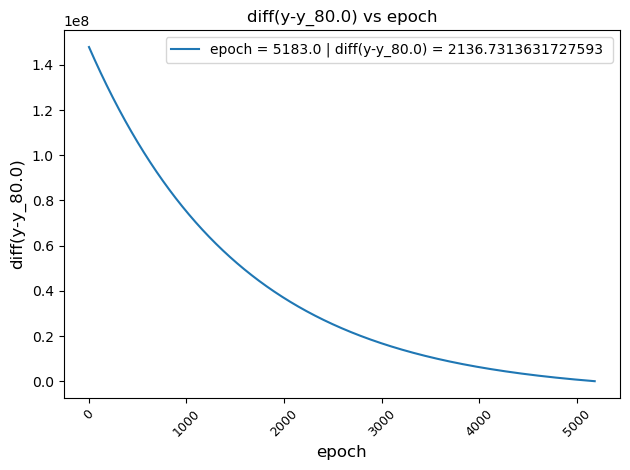

Con un error inicial de alpha=0.0001 y con valores de b1=10000 y b0=-5000 se necesitaron 0 epocas


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


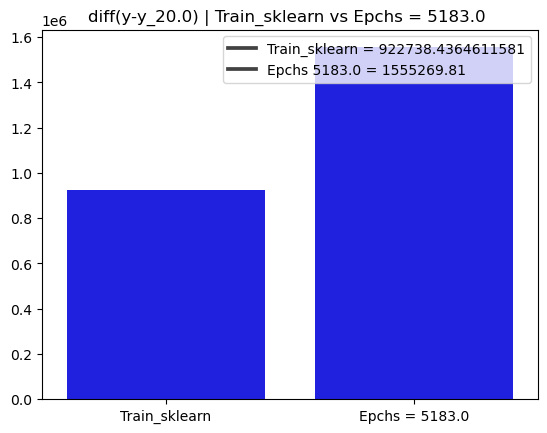

-------------------------------------------------------------
EPOCA = Train_sklearn
diff(y-y_20.0) = 922738.4364611581
VALOR DE B1 =46003.710631244845
VALOR DE B0 =-99037.91694162614
-------------------------------------------------------------
EPOCA = 5183.0
diff(y-y_20.0) = 1555269.8139231377
VALOR DE B1 =30656.666745116832
VALOR DE B0 =-4999.683755277695
-------------------------------------------------------------


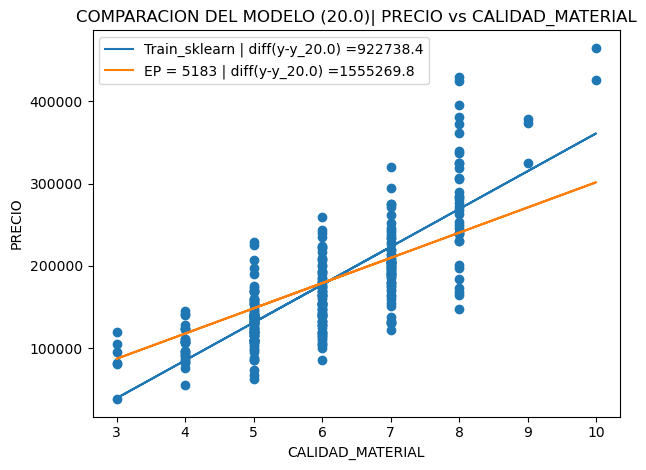

{'last_b1': 30656.666745116832, 'last_b0': -4999.683755277695, 'last_diff(y-y_80.0)': 2136.7313631727593, 'last_epchs': 5183.0, 'train_b0': -99037.91694162614, 'train_b1': 46003.710631244845, 'train_diff(y-y_80.0)': 922738.4364611581, 'last_diff(y-y_20.0)': 1555269.8139231377, 'train_diff(y-y_20.0)': 922738.4364611581}


In [58]:

print("PRIMER_ANALISIS")
lista_graf_2=["PRECIO","CALIDAD_MATERIAL"]
epchs=6000
b1=10000
b0=-5000
error_1=500
alpha_1=0.0001

data_entrenamiento=datos_1.entrenamiento_x(lista_graf_2,b1,b0,error_1,epchs,alpha_1)

print(data_entrenamiento)


SEGUNDO_ANALISIS


C:\Users\OMEN\AppData\Local\Temp\ipykernel_19828\335594221.py:249: RuntimeWarning: invalid value encountered in double_scalars
  pend_1=(b1_ant-b1_1)/(error_ant-error_actual)
C:\Users\OMEN\AppData\Local\Temp\ipykernel_19828\335594221.py:250: RuntimeWarning: invalid value encountered in double_scalars
  pend_2=(b0_ant-b0_0)/(error_ant-error_actual)


            b1           b0  diff(y-y_80.0)   epoch        pend_1  \
0    -0.610000  1000.000000    2.132363e+08     0.0 -2.860676e-09   
1    -0.602245   999.990000    2.132258e+08     1.0 -7.339294e-07   
2     1.387198   999.987982    2.105121e+08     2.0 -7.331197e-07   
3     3.348641   999.987980    2.078366e+08     3.0 -7.331190e-07   
4     5.284640   999.987980    2.051959e+08     4.0 -7.331190e-07   
...        ...          ...             ...     ...           ...   
3497       NaN          NaN    0.000000e+00  3497.0           NaN   
3498       NaN          NaN    0.000000e+00  3498.0           NaN   
3499       NaN          NaN    0.000000e+00  3499.0           NaN   
3500       NaN          NaN    0.000000e+00  3500.0           NaN   
3501       NaN          NaN    0.000000e+00  3500.0           NaN   

            pend_2  
0     4.689632e-06  
1     9.464256e-07  
2     7.436515e-10  
3     5.851205e-13  
4     4.605126e-16  
...            ...  
3497           NaN  
349

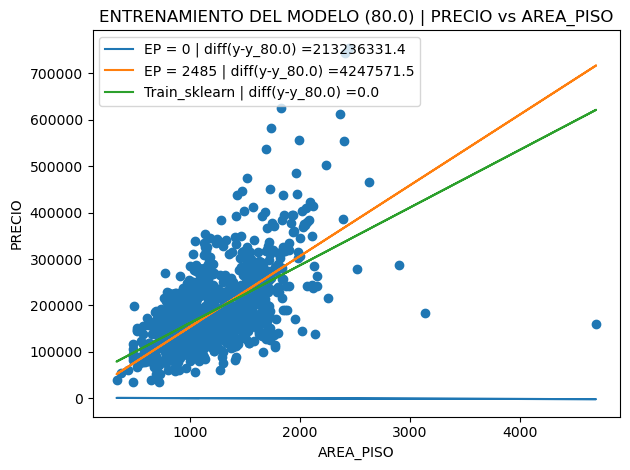

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


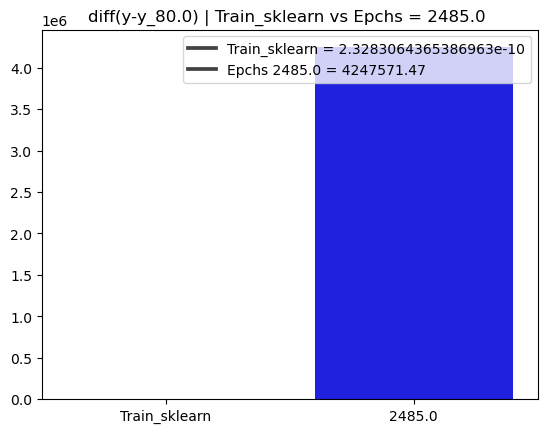

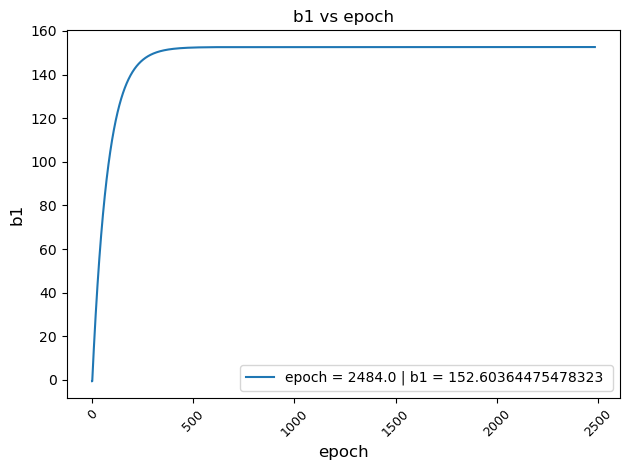

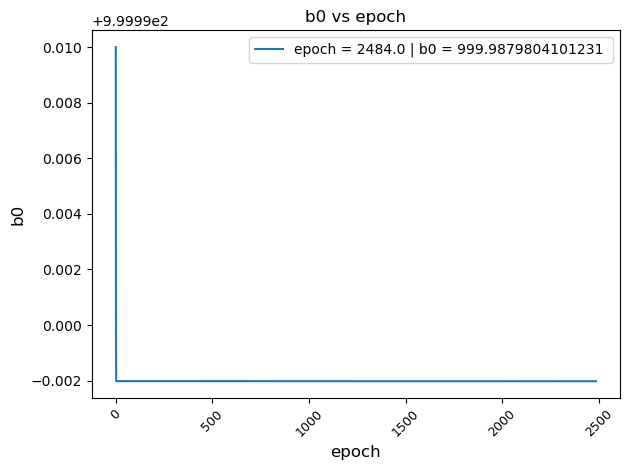

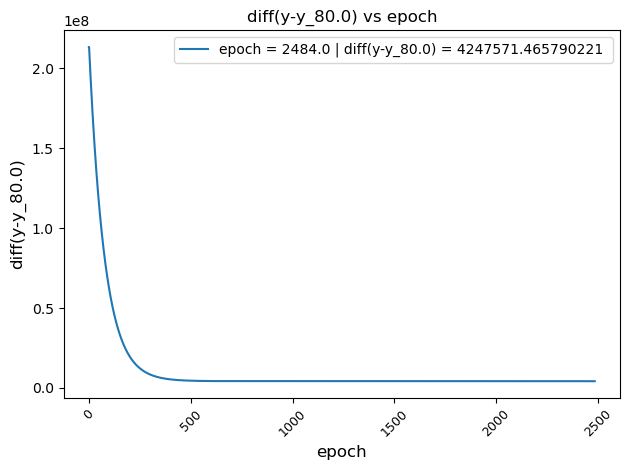

Con un error inicial de alpha=1e-05 y con valores de b1=-0.61 y b0=1000 se necesitaron 0 epocas


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


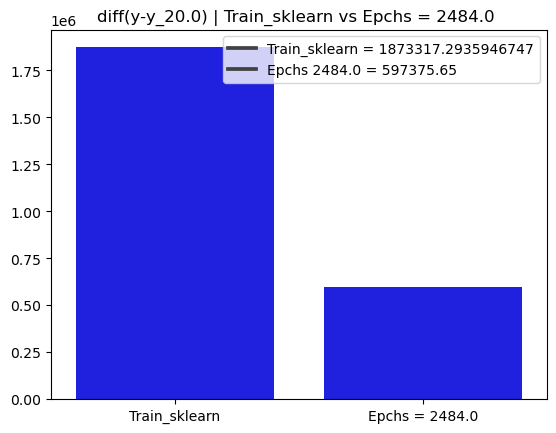

-------------------------------------------------------------
EPOCA = Train_sklearn
diff(y-y_20.0) = 1873317.2935946747
VALOR DE B1 =124.47172090097916
VALOR DE B0 =37490.14227811035
-------------------------------------------------------------
EPOCA = 2484.0
diff(y-y_20.0) = 597375.6515244878
VALOR DE B1 =152.60364475478323
VALOR DE B0 =999.9879804101231
-------------------------------------------------------------


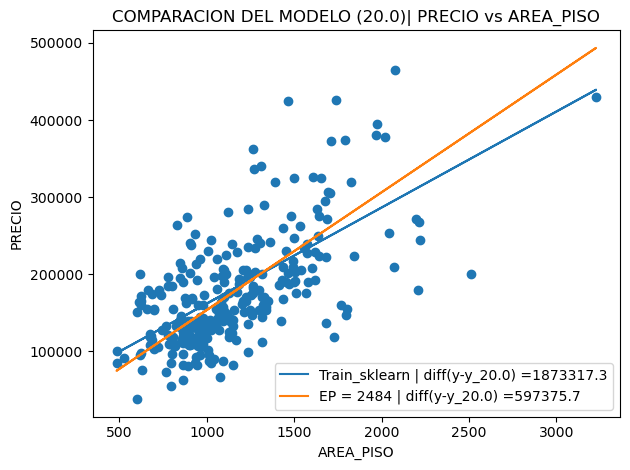

{'last_b1': 152.60364475478323, 'last_b0': 999.9879804101231, 'last_diff(y-y_80.0)': 4247571.465790221, 'last_epchs': 2484.0, 'train_b0': 37490.14227811035, 'train_b1': 124.47172090097916, 'train_diff(y-y_80.0)': 1873317.2935946747, 'last_diff(y-y_20.0)': 597375.6515244878, 'train_diff(y-y_20.0)': 1873317.2935946747}


In [59]:
lista_graf_3=["PRECIO","AREA_PISO"]
print("SEGUNDO_ANALISIS")
epchs_2=3500
b1_2=-0.61
b0_2=1000
error_2=0
alpha_2=0.00001

data_entrenamiento_2=datos_1.entrenamiento_x(lista_graf_3,b1_2,b0_2,error_2,epchs_2,alpha_2)
print(data_entrenamiento_2)

TERCER_ANALISIS


C:\Users\OMEN\AppData\Local\Temp\ipykernel_19828\335594221.py:249: RuntimeWarning: invalid value encountered in double_scalars
  pend_1=(b1_ant-b1_1)/(error_ant-error_actual)
C:\Users\OMEN\AppData\Local\Temp\ipykernel_19828\335594221.py:250: RuntimeWarning: invalid value encountered in double_scalars
  pend_2=(b0_ant-b0_0)/(error_ant-error_actual)


                b1            b0  diff(y-y_80.0)   epoch        pend_1  \
0        10.000000    500.000000    2.129118e+08     0.0  4.696781e-08   
1        -3.866532    399.999998    2.131346e+08     1.0 -6.222327e-05   
2     18385.308634  19527.974855    5.015275e+07     2.0 -1.128296e-04   
3     26346.284611  20705.186209    1.210777e+07     3.0 -1.278655e-04   
4     24303.838920  20659.399873    3.566331e+06     4.0 -1.303070e-04   
...            ...           ...             ...     ...           ...   
5997           NaN           NaN    0.000000e+00  5997.0           NaN   
5998           NaN           NaN    0.000000e+00  5998.0           NaN   
5999           NaN           NaN    0.000000e+00  5999.0           NaN   
6000           NaN           NaN    0.000000e+00  6000.0           NaN   
6001           NaN           NaN    0.000000e+00  6000.0           NaN   

        pend_2  
0     0.000002  
1    -0.000449  
2    -0.000117  
3    -0.000019  
4    -0.000003  
...      

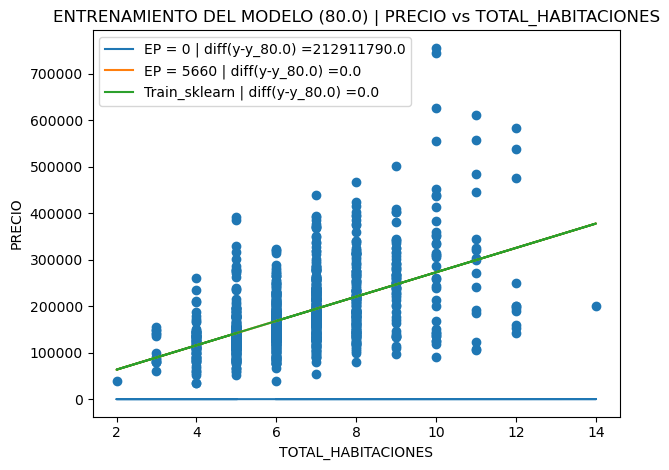

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


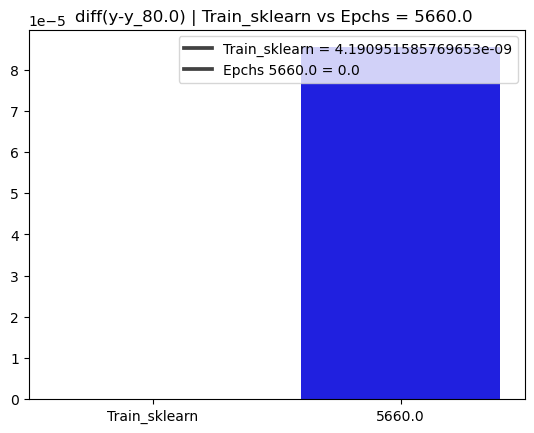

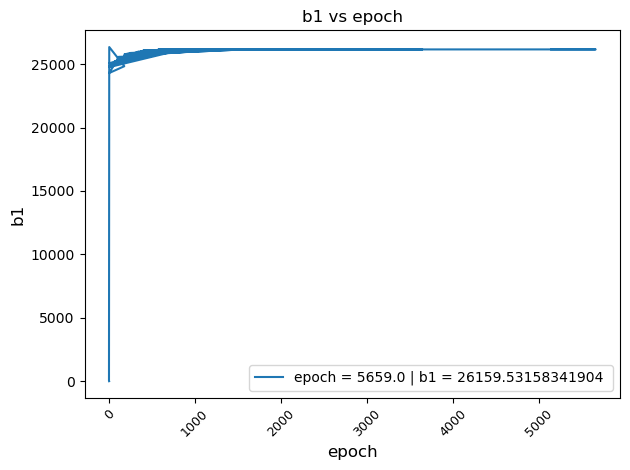

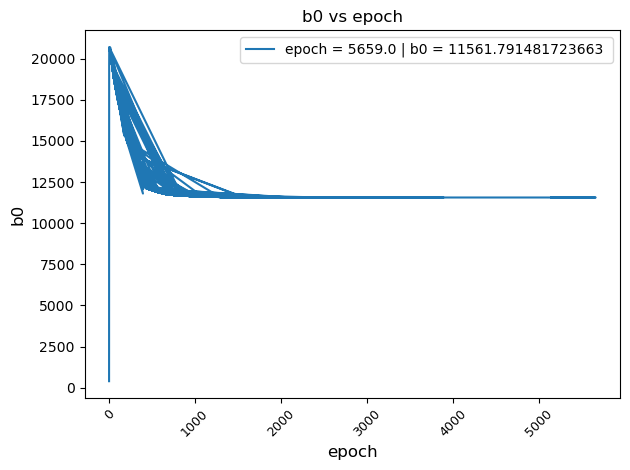

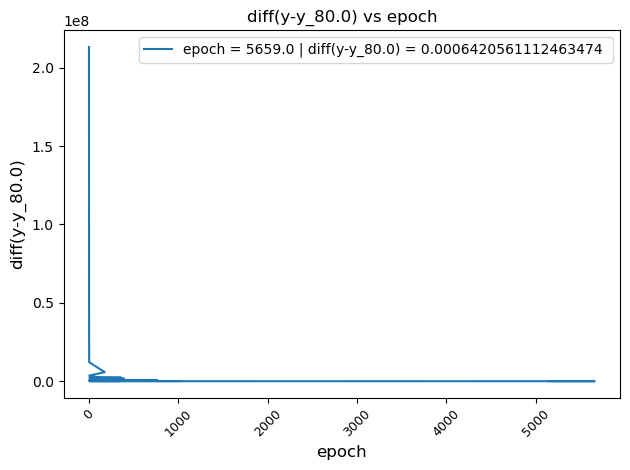

Con un error inicial de alpha=0.2 y con valores de b1=10 y b0=500 se necesitaron 0 epocas


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


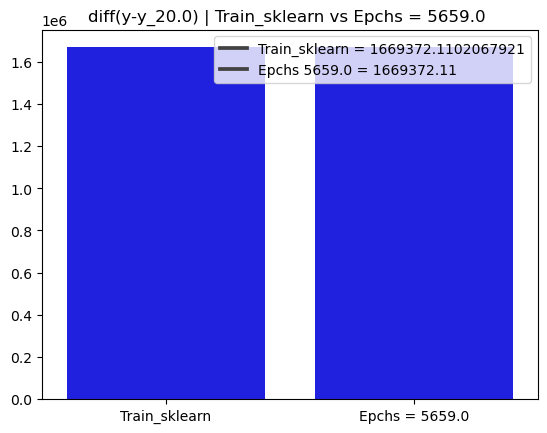

-------------------------------------------------------------
EPOCA = Train_sklearn
diff(y-y_20.0) = 1669372.1102067921
VALOR DE B1 =26159.53158620929
VALOR DE B0 =11561.791462903551
-------------------------------------------------------------
EPOCA = 5659.0
diff(y-y_20.0) = 1669372.110490076
VALOR DE B1 =26159.53158341904
VALOR DE B0 =11561.791481723663
-------------------------------------------------------------


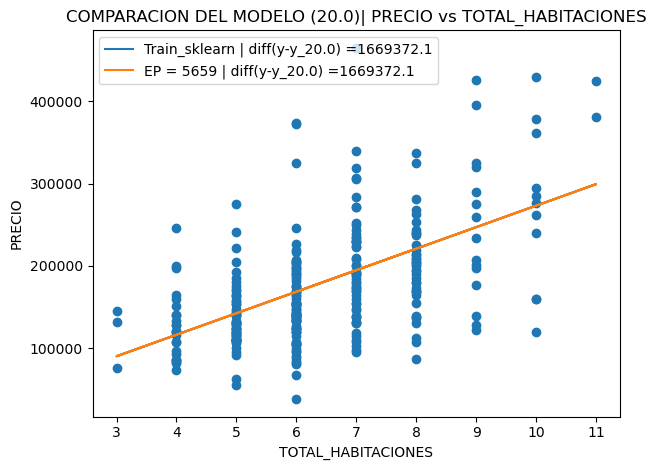

{'last_b1': 26159.53158341904, 'last_b0': 11561.791481723663, 'last_diff(y-y_80.0)': 0.0006420561112463474, 'last_epchs': 5659.0, 'train_b0': 11561.791462903551, 'train_b1': 26159.53158620929, 'train_diff(y-y_80.0)': 1669372.1102067921, 'last_diff(y-y_20.0)': 1669372.110490076, 'train_diff(y-y_20.0)': 1669372.1102067921}


In [62]:
lista_graf_4=["PRECIO","TOTAL_HABITACIONES"]
print("TERCER_ANALISIS")
epchs_3=6000
b1_3=10
b0_3=500
error_3=5
alpha_3=0.2

data_entrenamiento_3=datos_1.entrenamiento_x(lista_graf_4,b1_3,b0_3,error_3,epchs_3,alpha_3)
print(data_entrenamiento_3)

CUARTO_ANALISIS
              b1          b0  diff(y-y_80.0)   epoch        pend_1  \
0      -0.200000 -500.000000    2.146168e+08     0.0 -9.318933e-10   
1       0.195717 -499.500000    2.137050e+08     1.0 -4.339657e-07   
2     183.693551 -499.382820    2.088639e+08     2.0 -4.342436e-07   
3       5.436709 -499.382877    2.016356e+08     3.0 -4.342438e-07   
4     178.716371 -499.382877    1.974022e+08     4.0 -4.342438e-07   
...          ...         ...             ...     ...           ...   
1997   93.303204 -499.382877    7.081063e+05  1997.0 -4.341647e-07   
1998   93.303204 -499.382877    7.081063e+05  1998.0 -4.341647e-07   
1999   93.303204 -499.382877    7.081063e+05  1999.0 -4.341647e-07   
2000   93.303204 -499.382877    7.081063e+05  2000.0 -4.341647e-07   
2001   93.303204 -499.382877    7.081063e+05  2000.0 -4.341647e-07   

            pend_2  
0    -2.329733e-06  
1    -5.483281e-07  
2    -2.773050e-10  
3    -1.410940e-13  
4    -7.129541e-17  
...            ..

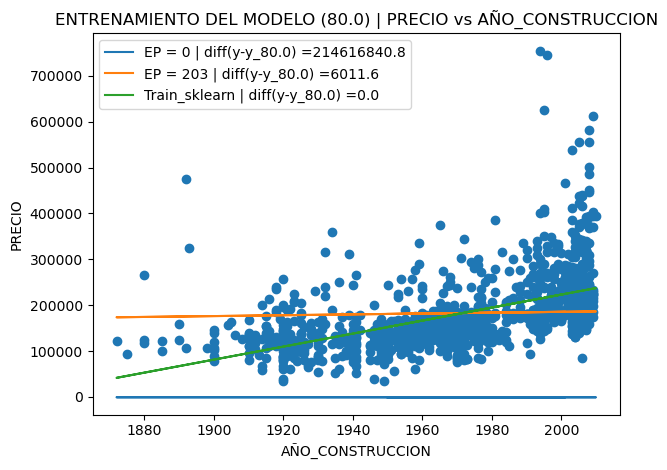

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


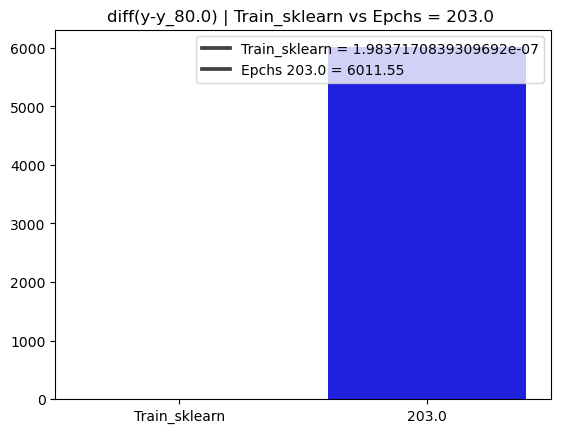

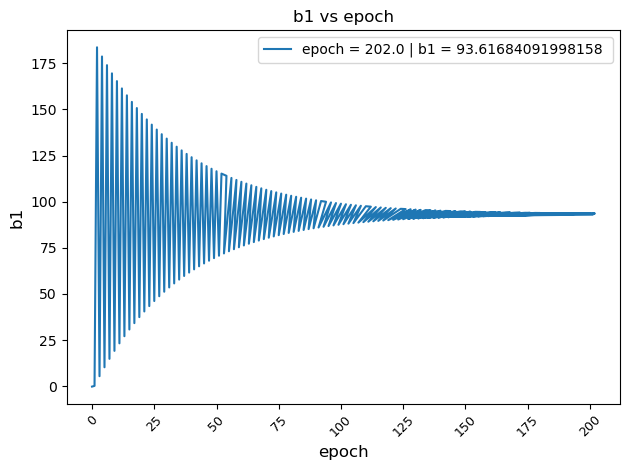

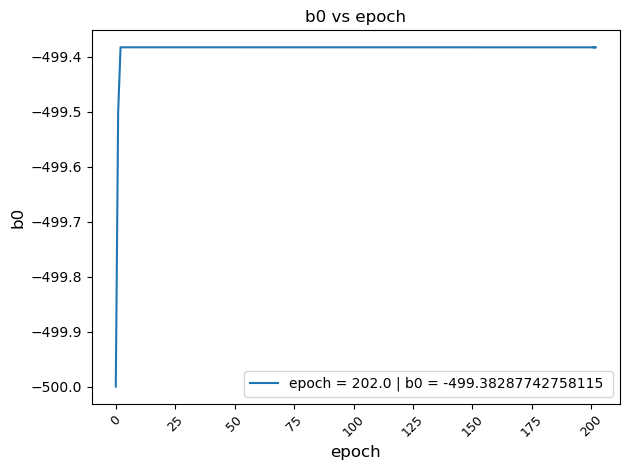

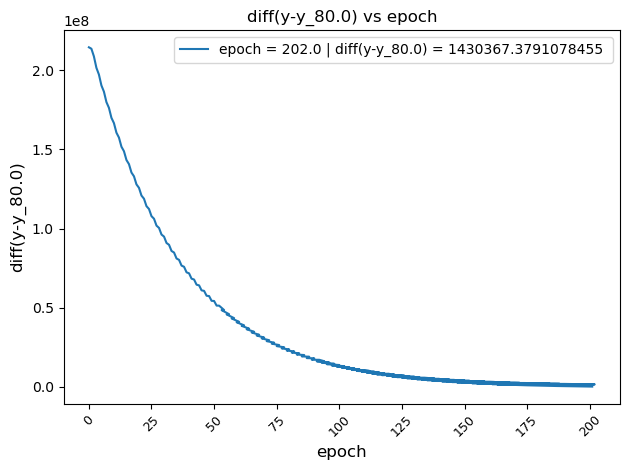

Con un error inicial de alpha=0.001 y con valores de b1=-0.2 y b0=-500 se necesitaron 0 epocas


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


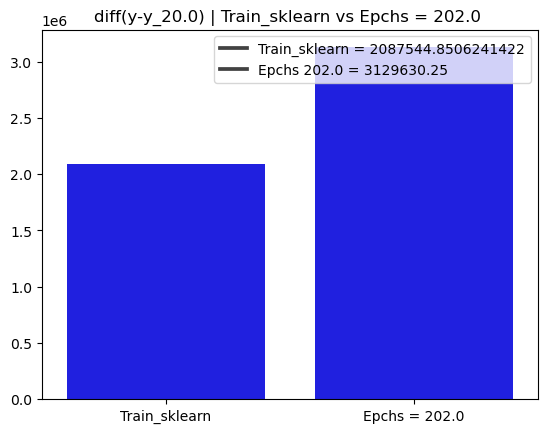

-------------------------------------------------------------
EPOCA = Train_sklearn
diff(y-y_20.0) = 2087544.8506241422
VALOR DE B1 =1418.870569943676
VALOR DE B0 =-2614622.8574290015
-------------------------------------------------------------
EPOCA = 202.0
diff(y-y_20.0) = 3129630.2464417913
VALOR DE B1 =93.61684091998158
VALOR DE B0 =-499.38287742758115
-------------------------------------------------------------


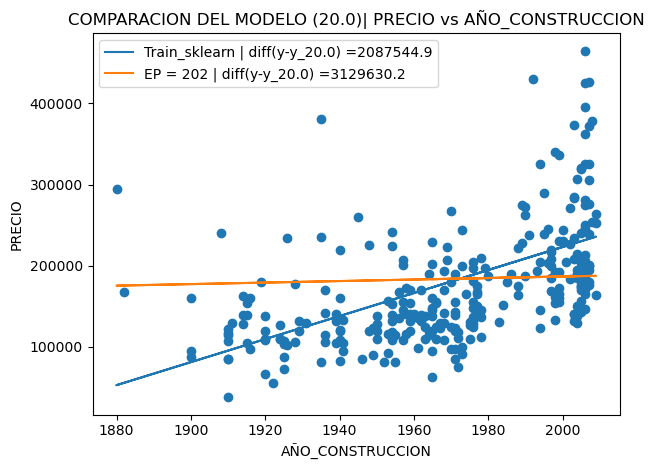

{'last_b1': 93.61684091998158, 'last_b0': -499.38287742758115, 'last_diff(y-y_80.0)': 1430367.3791078455, 'last_epchs': 202.0, 'train_b0': -2614622.8574290015, 'train_b1': 1418.870569943676, 'train_diff(y-y_80.0)': 2087544.8506241422, 'last_diff(y-y_20.0)': 3129630.2464417913, 'train_diff(y-y_20.0)': 2087544.8506241422}


In [63]:
lista_graf_5=["PRECIO","AÑO_CONSTRUCCION"]
print("CUARTO_ANALISIS")
epchs_4=2000
b1_4=-0.2
b0_4=-500
error_4=5
alpha_4=0.001

data_entrenamiento_4=datos_1.entrenamiento_x(lista_graf_5,b1_4,b0_4,error_4,epchs_4,alpha_4)
print(data_entrenamiento_4)

QUINTO_ANALISIS
               b1          b0  diff(y-y_80.0)   epoch        pend_1  \
0       -0.200000 -500.000000    1.762162e+08     0.0 -1.134969e-09   
1       -0.198514 -499.950000    1.762161e+08     1.0 -1.001721e-05   
2       12.917130 -494.010705    1.753243e+08     2.0 -1.470690e-05   
3       32.069666 -493.893941    1.740302e+08     3.0 -1.480016e-05   
4       51.192582 -493.892371    1.727382e+08     4.0 -1.480142e-05   
...           ...         ...             ...     ...           ...   
1997  2456.784483 -493.892349    1.021403e+07  1997.0 -1.480144e-05   
1998  2456.784486 -493.892349    1.021403e+07  1998.0 -1.480144e-05   
1999  2456.784489 -493.892349    1.021403e+07  1999.0 -1.480144e-05   
2000  2456.784491 -493.892349    1.021403e+07  2000.0 -1.480144e-05   
2001  2456.784491 -493.892349    1.021403e+07  2000.0 -1.480144e-05   

            pend_2  
0    -2.837423e-06  
1    -3.370462e-04  
2    -6.659883e-06  
3    -9.022952e-08  
4    -1.215409e-09  
...  

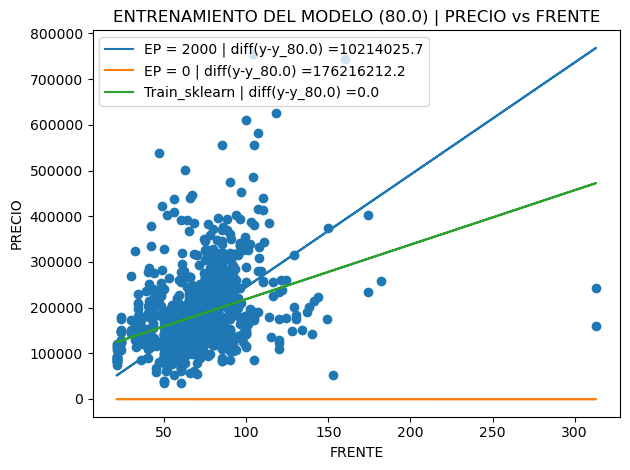

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


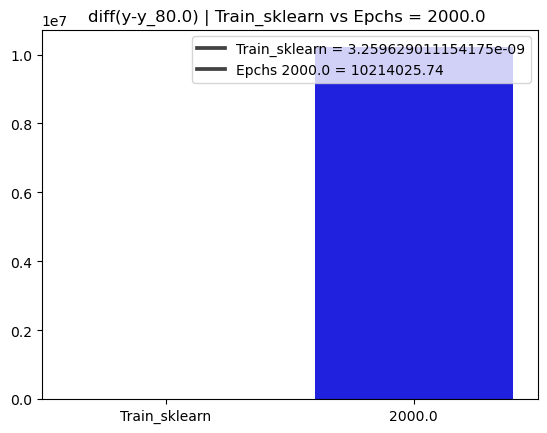

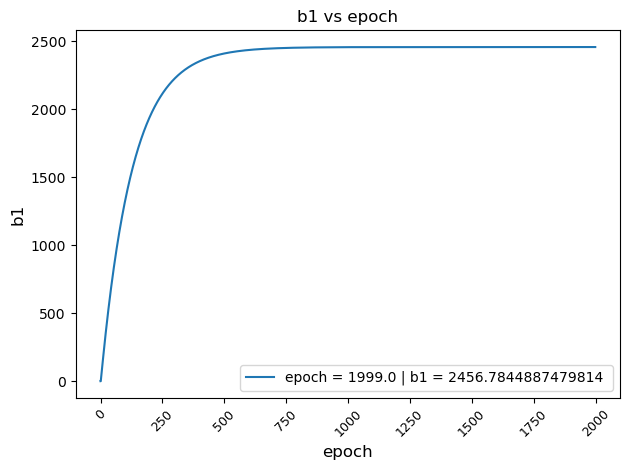

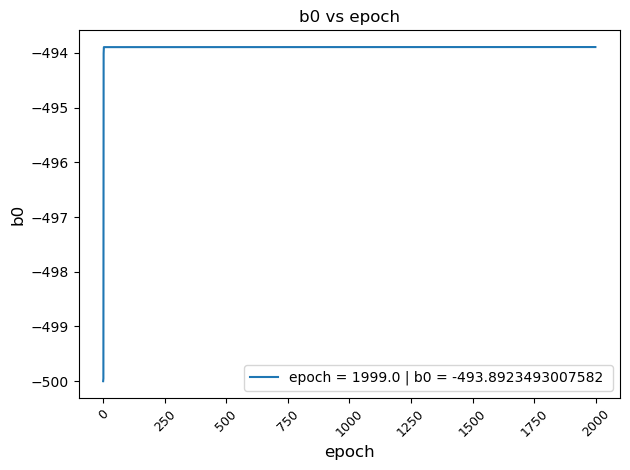

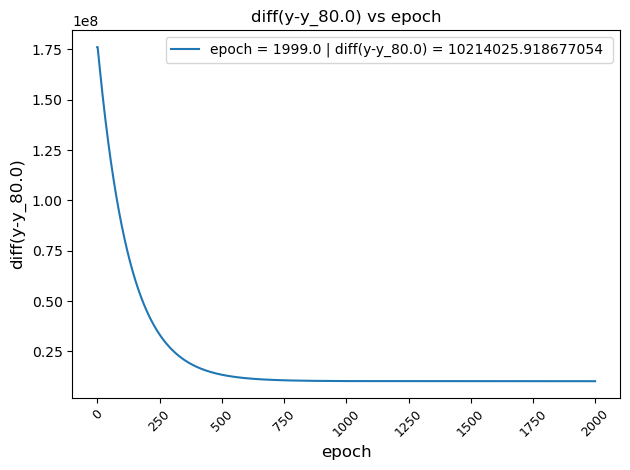

Con un error inicial de alpha=0.0001 y con valores de b1=-0.2 y b0=-500 se necesitaron 0 epocas


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


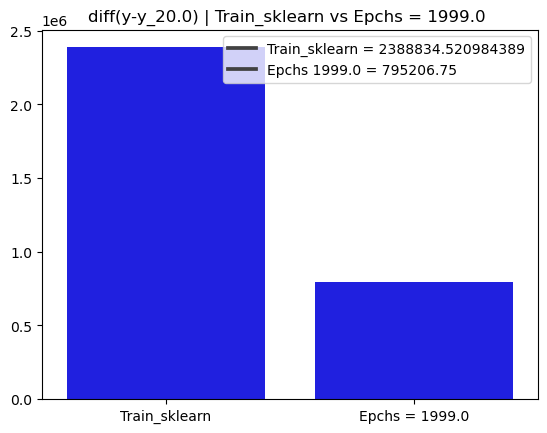

-------------------------------------------------------------
EPOCA = Train_sklearn
diff(y-y_20.0) = 2388834.520984389
VALOR DE B1 =1192.466536785049
VALOR DE B0 =99227.28707848312
-------------------------------------------------------------
EPOCA = 1999.0
diff(y-y_20.0) = 795206.7544654794
VALOR DE B1 =2456.7844887479814
VALOR DE B0 =-493.8923493007582
-------------------------------------------------------------


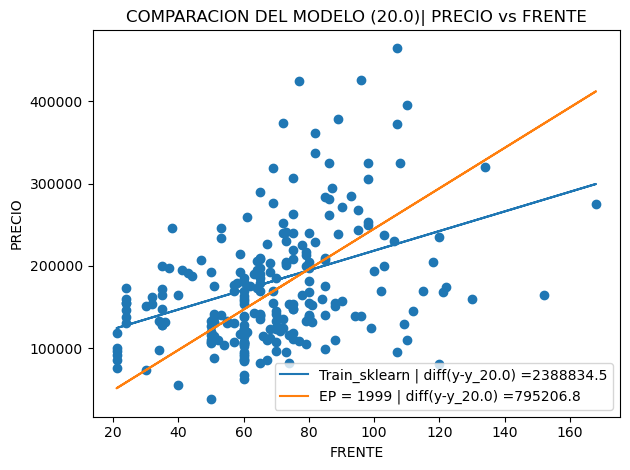

{'last_b1': 2456.7844887479814, 'last_b0': -493.8923493007582, 'last_diff(y-y_80.0)': 10214025.918677054, 'last_epchs': 1999.0, 'train_b0': 99227.28707848312, 'train_b1': 1192.466536785049, 'train_diff(y-y_80.0)': 2388834.520984389, 'last_diff(y-y_20.0)': 795206.7544654794, 'train_diff(y-y_20.0)': 2388834.520984389}


In [64]:
lista_graf_6=["PRECIO","FRENTE"]
print("QUINTO_ANALISIS")
epchs_5=2000
b1_5=-0.2
b0_5=-500
error_5=5
alpha_5=0.0001

data_entrenamiento_5=datos_1.entrenamiento_x(lista_graf_6,b1_5,b0_5,error_5,epchs_5,alpha_5)
print(data_entrenamiento_5)